# 2. KODEX200 개월수별 절대모멘텀

In [1]:
import pandas as pd
import numpy as np

### 함수

In [2]:
def 월별수익(data):
    result = data/data.shift(1)
    return result

In [3]:
def 절대모멘텀(data,month):
    # shift를 사용하여 원화는 달의 수익률을 구한다
    # 당월주가 > n 개월 전 주가(n개월 모멘텀 > 0) --> 주식매수
    # 당월주가 < n 개월 전 주가(n개월 모멘텀 < 0) --> 주식매도
    result = np.where(data > data.shift(month),1,0)
    return result

In [14]:
def CAGR(data):
    y = data.index.year.unique()
    result = (data[-1]/data[0])**(1/len(y))-1
    return np.round(result,4)

In [5]:
def MDD(data):
    # We are going to use a trailing 252 trading day window
    window = len(data)

    # Calculate the max drawdown in the past window days for each day in the series.
    # Use min_periods=1 if you want to let the first 252 days data have an expanding window
    Roll_Max = data.rolling(window, min_periods=1).max()
    Roll_Max.rename("Roll_Max", inplace=True)
    Drawdown = data/Roll_Max - 1.0
    Drawdown.rename("Drawdown", inplace=True)

    # Next we calculate the minimum (negative) daily drawdown in that window.
    # Again, use min_periods=1 if you want to allow the expanding window
    Max_Drawdown = Drawdown.rolling(window, min_periods=1).min()
    Max_Drawdown.rename("Max_Drawdown", inplace=True)
    
    return np.round(Drawdown,4), np.round(Max_Drawdown,4)

# Main

### csv 파일 읽어오기

In [6]:
df = pd.read_csv("KODEX200_monthly_data.csv", encoding="utf-8")

### Index는 datetime 형으로 변환하기

In [7]:
df.index = pd.to_datetime(df["Date"])
df.head()

,Date,Open,High,Low,Close,Volume,Change
Date,,,,,,,
2010-01-29,2010-01-29,19052,19066,18668,18742,2717811,-0.026996
2010-02-26,2010-02-26,18611,18683,18514,18559,974615,0.000431
2010-03-31,2010-03-31,19853,19858,19729,19789,883019,-0.003776
2010-04-30,2010-04-30,20331,20403,20313,20377,758179,0.007814
2010-05-31,2010-05-31,18887,19126,18882,19134,1979678,0.012220


### 개월수별 절대모멘텀 값 구하기, CAGR/MDD 구하기

In [25]:
KODEX200 = df["Close"]
KODEX200.rename("KODEX200", inplace=True)

# CAGR 구하기
KODEX200_CAGR = CAGR(KODEX200)
# MDD 구하기
KODEX200_DD,KODEX200_MDD  = MDD(KODEX200)

print ("KODEX200 CAGR {:.2%} ".format(KODEX200_CAGR))
print ("KODEX200 MDD {:.2%}".format(KODEX200_MDD[-1]))

# dataframe 블리언 색인을 통해 절대 모멘텀 스코어 1인 값만을 뽑니다.
for i in range(1,13):
    절대모멘텀개월 = KODEX200[절대모멘텀(KODEX200,i) == 1]
    절대모멘텀개월 = 월별수익(절대모멘텀개월) * 절대모멘텀개월.shift(1)
    # 앞의 shift코드로 인해 na값이 발생하여 제거하고 계산
    절대모멘텀개월CAGR = CAGR(절대모멘텀개월.dropna())
    절대모멘텀개월DD,절대모멘텀개월MDD = MDD(절대모멘텀개월)
    print ("절대모멘텀 {}개월 CAGR {:.2%} ".format(i,절대모멘텀개월CAGR))
    print ("절대모멘텀 {}개월 MDD {:.2%}".format(i,절대모멘텀개월MDD[-1]))

KODEX200 CAGR 3.41% 
KODEX200 MDD -20.68%
절대모멘텀 1개월 CAGR 3.24% 
절대모멘텀 1개월 MDD -17.82%
절대모멘텀 2개월 CAGR 3.00% 
절대모멘텀 2개월 MDD -19.58%
절대모멘텀 3개월 CAGR 5.14% 
절대모멘텀 3개월 MDD -16.89%
절대모멘텀 4개월 CAGR 5.91% 
절대모멘텀 4개월 MDD -12.81%
절대모멘텀 5개월 CAGR 5.13% 
절대모멘텀 5개월 MDD -15.75%
절대모멘텀 6개월 CAGR 4.94% 
절대모멘텀 6개월 MDD -14.92%
절대모멘텀 7개월 CAGR 4.47% 
절대모멘텀 7개월 MDD -14.61%
절대모멘텀 8개월 CAGR 4.38% 
절대모멘텀 8개월 MDD -14.92%
절대모멘텀 9개월 CAGR 3.58% 
절대모멘텀 9개월 MDD -14.92%
절대모멘텀 10개월 CAGR 2.62% 
절대모멘텀 10개월 MDD -16.50%
절대모멘텀 11개월 CAGR 2.85% 
절대모멘텀 11개월 MDD -16.50%
절대모멘텀 12개월 CAGR 3.65% 
절대모멘텀 12개월 MDD -16.50%


### Monthly & Max MDD

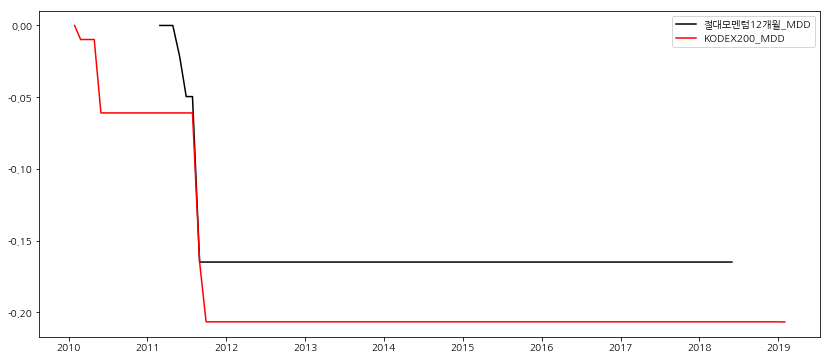

In [26]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False
from matplotlib import rc, font_manager
rc("font", family="NanumGothic")

%matplotlib inline

fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(1,1,1)
ax.plot(절대모멘텀12개월_MDD,color="Black",label="절대모멘텀12개월_MDD");
ax.plot(KODEX200_MDD,color="Red", label="KODEX200_MDD");
ax.legend()

### 그래프 그리기

In [ ]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False
from matplotlib import rc, font_manager
rc("font", family="NanumGothic")

%matplotlib inline

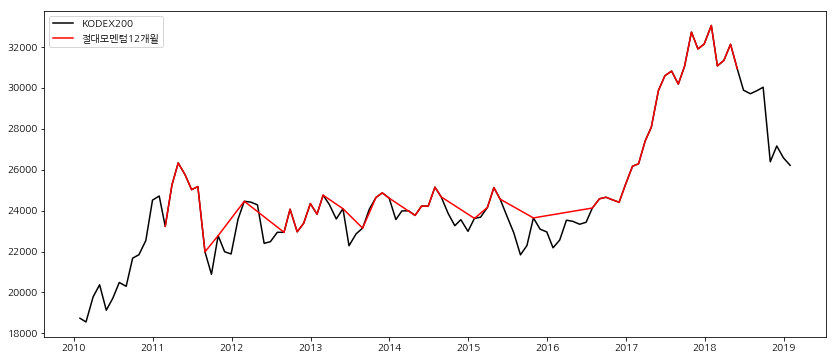

In [41]:
절대모멘텀12개월 = KODEX200[절대모멘텀(KODEX200,12) == 1]
절대모멘텀12개월 = 월별수익(절대모멘텀12개월) * 절대모멘텀12개월.shift(1)
#절대모멘텀12개월 = 절대모멘텀12개월.cumprod()
절대모멘텀12개월_CAGR = CAGR(절대모멘텀12개월.dropna())
절대모멘텀12개월_DD,절대모멘텀12개월_MDD  = MDD(절대모멘텀12개월)

fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(1,1,1)
ax.plot(KODEX200,color="Black",label="KODEX200");
ax.plot(절대모멘텀12개월,color="Red",label="절대모멘텀12개월");
ax.legend()